In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [42]:
# Load the full dataset from CSV into a pandas DataFrame
full_df = pd.read_csv('merged_data.csv')
full_df['use_date'] = full_df['use_date'].str.replace('-', '').astype(float)
full_df['sunrise'] = pd.to_datetime(full_df['sunrise'])
full_df['sunset'] = pd.to_datetime(full_df['sunset'])
full_df['sunrise_time'] = full_df['sunrise'].dt.hour * 60 + full_df['sunrise'].dt.minute
full_df.drop(columns=['sunrise'], inplace=True)
full_df['sunset_time'] = full_df['sunset'].dt.hour * 60 + full_df['sunset'].dt.minute
full_df.drop(columns=['sunset'], inplace=True)
full_df.dropna(axis=0, inplace=True)

full_df.drop(columns=['name', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'icon', 'preciptype', 'description', 'conditions', 'stations',
                    'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'precipprob', 'preciptype', 'snow', 'dew', 'severerisk', 'winddir', 'windgust', 'solarenergy',
                    'moonphase', 'Unnamed: 0'], inplace=True)

# Assuming 'crime_rate' is the target variable and other columns are features
X = full_df.drop(columns=['violent_crime_count'])  # Features excluding the target variable
y = full_df['violent_crime_count']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 13.754447407407408
R-squared: 0.08817673762167344


         Feature  Importance
1           temp    0.136228
7      windspeed    0.131470
2      feelslike    0.124395
3       humidity    0.122635
12   sunset_time    0.111026
0       use_date    0.091254
11  sunrise_time    0.087090
4         precip    0.079577
8        uvindex    0.050189
5    precipcover    0.036502
6      snowdepth    0.023217
10       holiday    0.004070
9      full_moon    0.002348


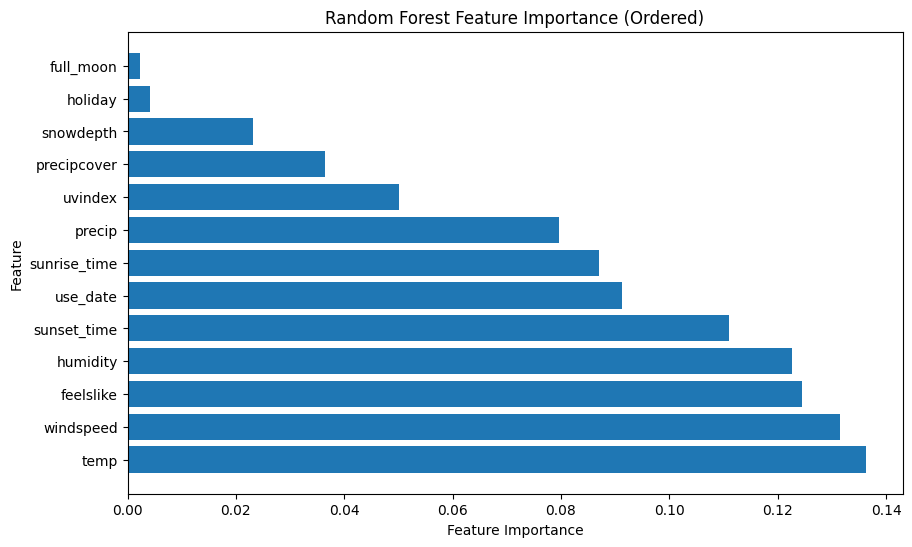

In [44]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [X.columns[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (Ordered)')
plt.show()